# Notes 5


In [1]:
import duckdb
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from variables import Variables as vars

plt.style.use('../../notebook.mplstyle')

os.makedirs("./output", exist_ok=True)

In [2]:
# con.close()
con = duckdb.connect("./data/us_births.db", read_only=True)

In [13]:
df = con.execute(
    f"""
    SELECT
        b.year,
        COUNT(*)                as birth_count,
        AVG(b.down_ind)::DOUBLE    as ds_recorded,
        AVG(b.p_ds_lb_nt)::DOUBLE       as ds_est_no_term,
        AVG(b.ds_case_weight)::DOUBLE   as case_weighted,
        AVG(b.down_ind)::DOUBLE / AVG(b.p_ds_lb_nt)::DOUBLE as recorded_ratio
    FROM us_births as b
    WHERE b.year >= 2000
    GROUP BY b.year
    ORDER BY b.year
    """
).df()

In [4]:
df

,year,birth_count,ds_recorded,ds_est_no_term,case_weighted
0,2004,4118907,0.000479,0.001806,0.001244
1,2005,4145614,0.000490,0.001808,0.001299
2,2006,4273225,0.000496,0.001794,0.001296
3,2007,4324008,0.000480,0.001792,0.001242
4,2008,4255156,0.000479,0.001809,0.001233
5,2009,4137836,0.000487,0.001828,0.001278
6,2010,4007105,0.000485,0.001857,0.001261
7,2011,3961220,0.000478,0.001875,0.001234
8,2012,3960796,0.000489,0.001894,0.001268
9,2013,3940764,0.000507,0.001920,0.001324


[]

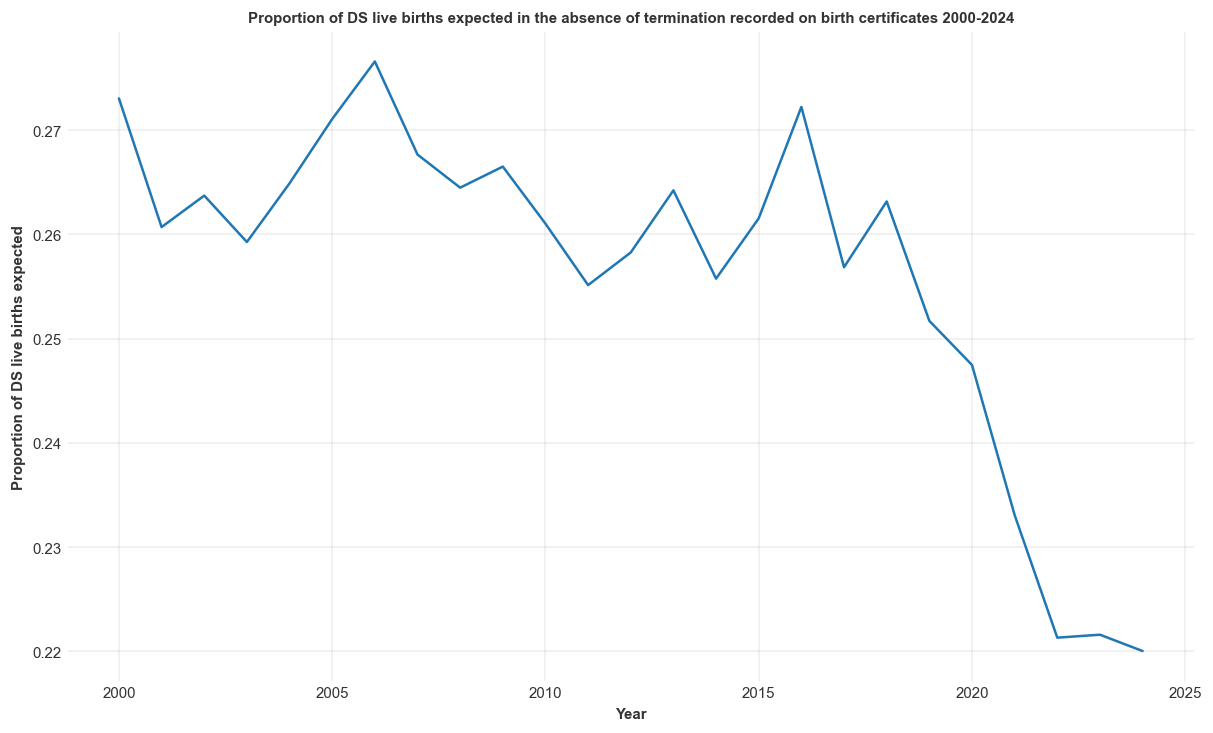

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['recorded_ratio'], label='Recorded')
plt.xlabel("Year")
plt.ylabel("Proportion of DS live births expected")
plt.title("Proportion of DS live births expected in the absence of termination recorded on birth certificates 2000-2024")
plt.plot()

In [25]:
base_year = 2000
cols = ["ds_recorded", "ds_est_no_term"]

# get the base (year 2000) value for each column
base = (
    df.loc[df["year"].eq(base_year), cols]
      .iloc[0]                 # assumes exactly one row for year 2000
)

# scale: value / base_value * 100
for c in cols:
    df[c + "_idx2000"] = df[c] / base[c] * 100


[]

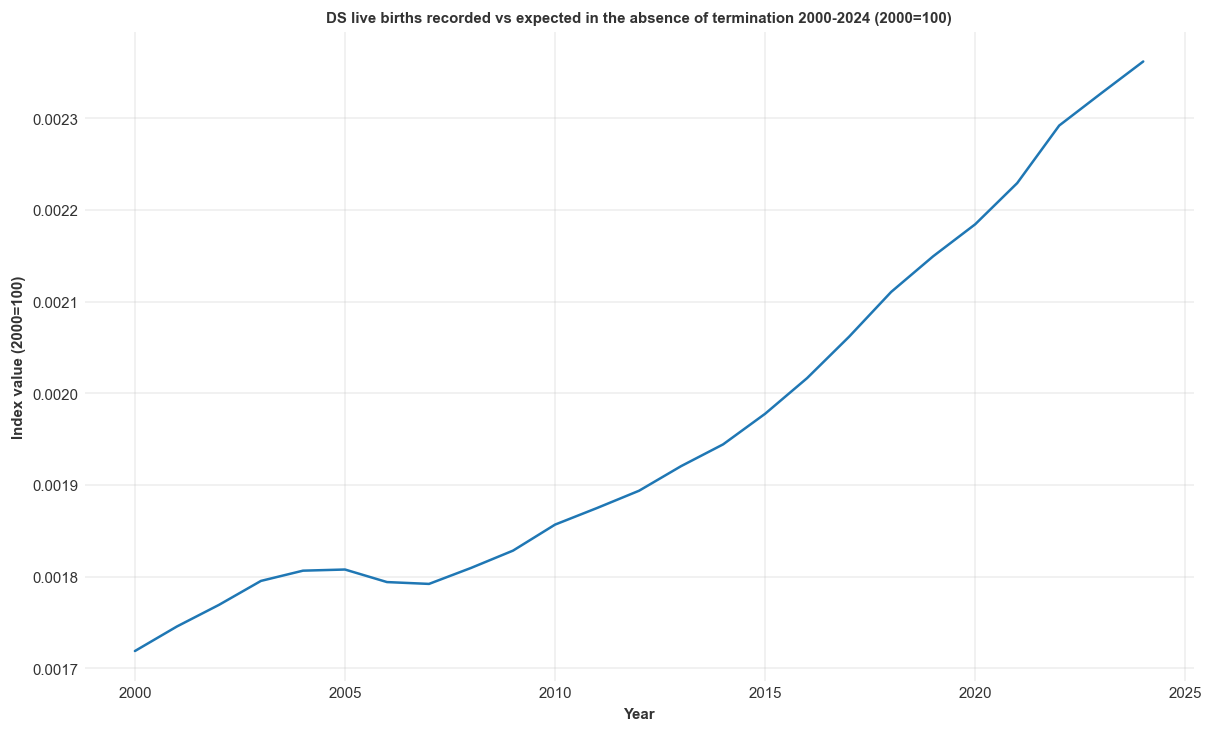

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ds_est_no_term'], label='Estimated No Termination')
plt.xlabel("Year")
plt.ylabel("Index value (2000=100)")
plt.title("DS live births recorded vs expected in the absence of termination 2000-2024 (2000=100)")
plt.plot()

[]

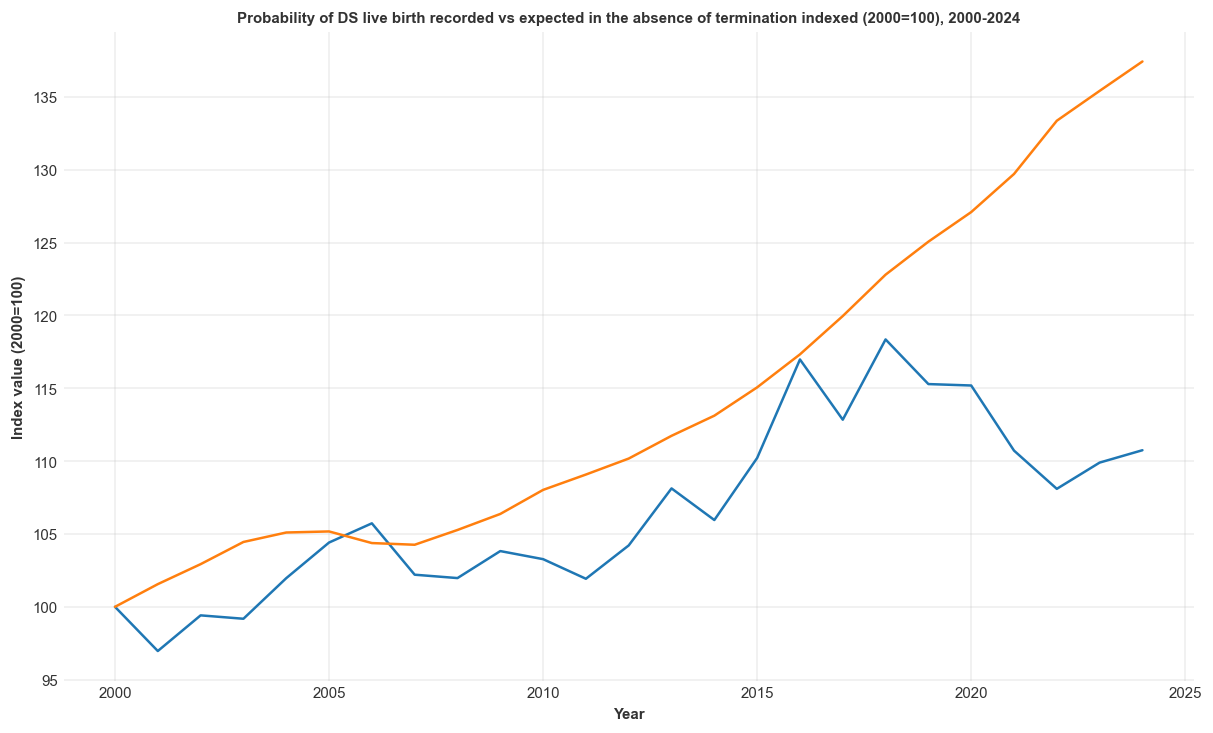

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ds_recorded_idx2000'], label='Recorded')
plt.plot(df['year'], df['ds_est_no_term_idx2000'], label='Estimated No Termination')
plt.xlabel("Year")
plt.ylabel("Index value (2000=100)")
plt.title("Probability of DS live birth recorded vs expected in the absence of termination indexed (2000=100), 2000-2024")
plt.plot()

In [30]:
base_year = 2018
cols = ["ds_recorded", "ds_est_no_term"]

# get the base (year 2000) value for each column
base = (
    df.loc[df["year"].eq(base_year), cols]
      .iloc[0]                 # assumes exactly one row for year 2000
)

# scale: value / base_value * 100
for c in cols:
    df[c + "_idx2018"] = df[c] / base[c] * 100


[]

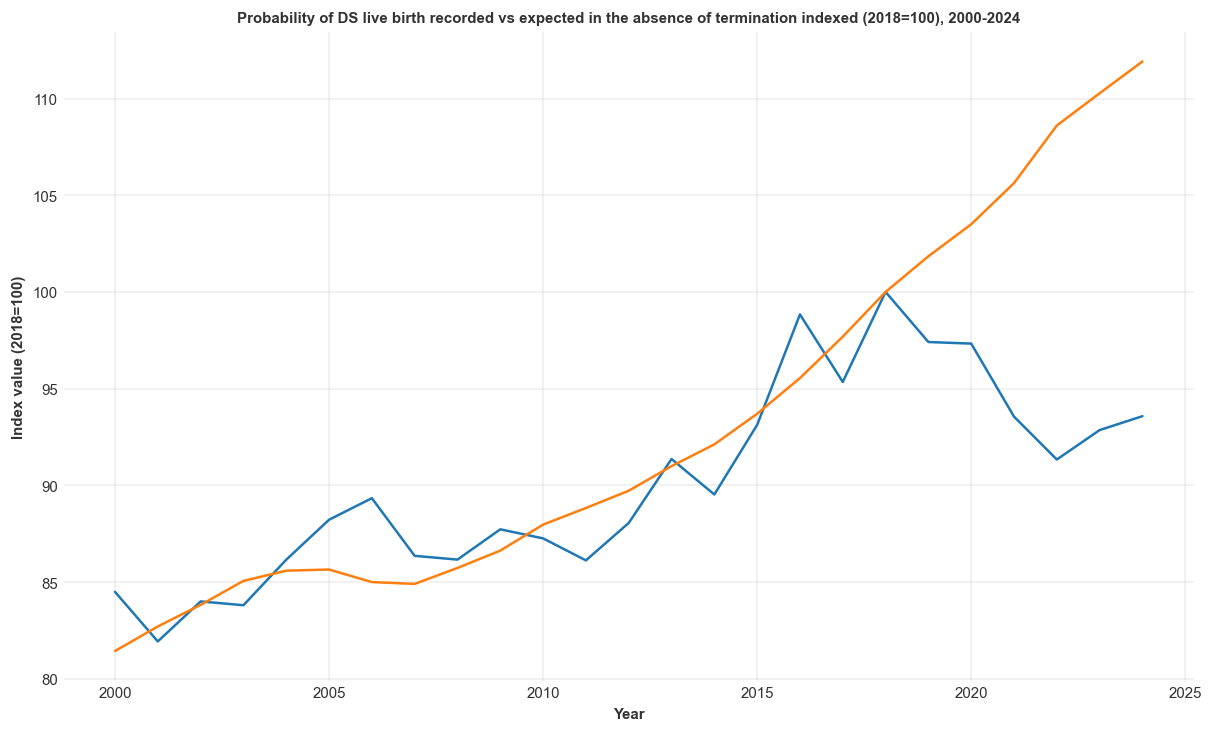

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ds_recorded_idx2018'], label='Recorded')
plt.plot(df['year'], df['ds_est_no_term_idx2018'], label='Estimated No Termination')
plt.xlabel("Year")
plt.ylabel("Index value (2018=100)")
plt.title("Probability of DS live birth recorded vs expected in the absence of termination indexed (2018=100), 2000-2024")
plt.plot()

In [33]:
base_year = 2016
cols = ["ds_recorded", "ds_est_no_term"]

# get the base (year 2000) value for each column
base = (
    df.loc[df["year"].eq(base_year), cols]
      .iloc[0]                 # assumes exactly one row for year 2000
)

# scale: value / base_value * 100
for c in cols:
    df[c + "_idx2016"] = df[c] / base[c] * 100


[]

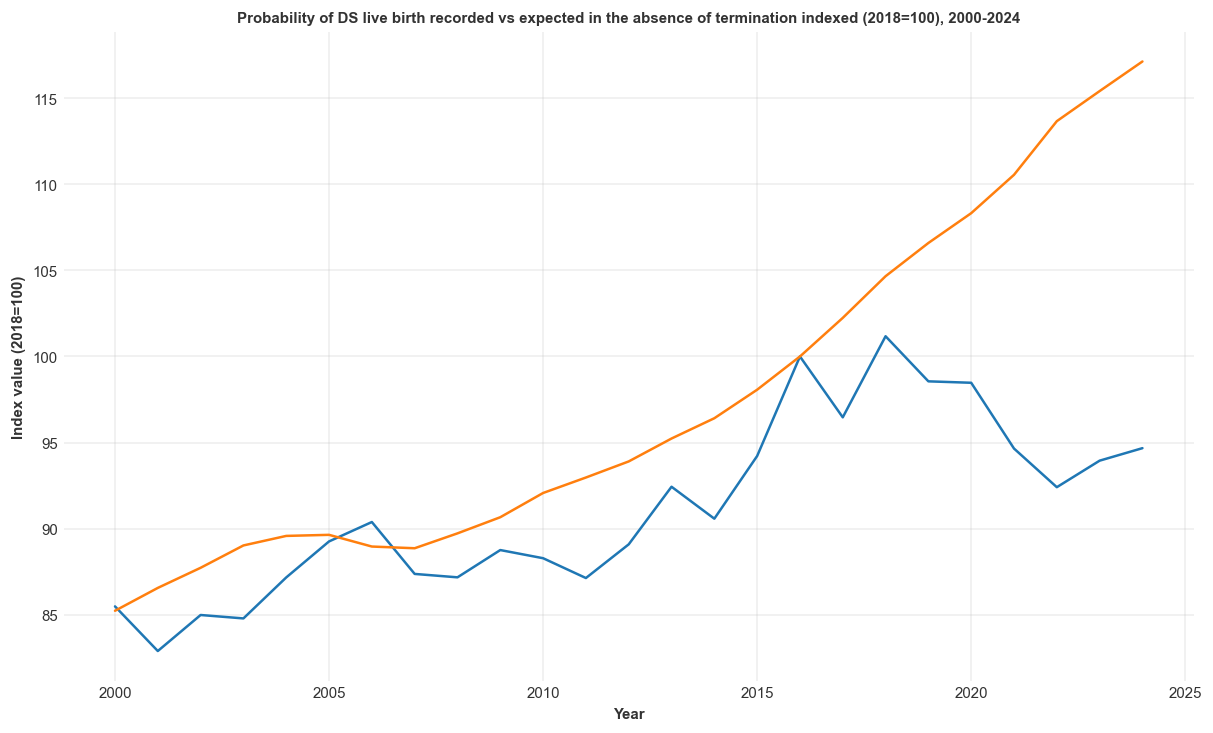

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['ds_recorded_idx2016'], label='Recorded')
plt.plot(df['year'], df['ds_est_no_term_idx2016'], label='Estimated No Termination')
plt.xlabel("Year")
plt.ylabel("Index value (2016=100)")
plt.title("Probability of DS live birth recorded vs expected in the absence of termination indexed (2016=100), 2000-2024")
plt.plot()

In [40]:
post_cfdna_df = con.execute(
    f"""
    SELECT
        pay_rec,
        AVG(b.down_ind)::DOUBLE    as ds_recorded,
        AVG(b.p_ds_lb_nt)::DOUBLE       as ds_est_no_term,
        AVG(b.ds_case_weight)::DOUBLE   as case_weighted,
        AVG(b.down_ind)::DOUBLE / AVG(b.p_ds_lb_nt)::DOUBLE as recorded_ratio
    FROM us_births as b
    WHERE b.year >= 2020
    GROUP BY pay_rec
    """
).df()
post_cfdna_df

,pay_rec,ds_recorded,ds_est_no_term,case_weighted,recorded_ratio
0,1,0.000537,0.001816,0.001391,0.295926
1,2,0.000485,0.002654,0.001153,0.182739
2,3,0.000730,0.002440,0.001809,0.299164
3,4,0.000563,0.002044,0.001387,0.275287
4,9,0.000617,0.002166,0.001472,0.284982


In [42]:
pre_cfdna_df = con.execute(
    f"""
    SELECT
        pay_rec,
        b.down_ind::DOUBLE    as ds_recorded,
        AVG(b.p_ds_lb_nt)::DOUBLE       as ds_est_no_term,
        AVG(b.ds_case_weight)::DOUBLE   as case_weighted,
        AVG(b.down_ind)::DOUBLE / AVG(b.p_ds_lb_nt)::DOUBLE as recorded_ratio
    FROM us_births as b
    WHERE pay_rec IS NOT NULL AND b.year >= 2011 AND b.year <= 2015
    GROUP BY pay_rec
    """
).df()
pre_cfdna_df

,pay_rec,ds_recorded,ds_est_no_term,case_weighted,recorded_ratio
0,1,0.000465,0.001458,0.001259,0.318971
1,2,0.000535,0.002348,0.001290,0.227811
2,3,0.000647,0.002121,0.001683,0.305010
3,4,0.000448,0.001654,0.001149,0.270903
4,9,0.000637,0.001922,0.001652,0.331383
